# Widgets in Jupyter Notebooks

* ipywdigets verfügt über ein breites Angebot Interaktivität einzubinden
* falls nicht vorhanden installieren:
  * pip install ipywidgets
* ggf. müssen vorher einige Abhängigkeiten installiert und Einstellungen aktivitiert werden (nur wenn die Widgets nicht funktionieren)
  * npm (z.B. sudo apt install npm ggf. danach upgraden: npm install -g npm)
  * jupyter labextension install @jupyter-widgets/jupyterlab-manager
  * jupyter nbextension enable --py widgetsnbextension
  * jupyter nbextension enable --py --sys-prefix widgetsnbextension

### Beispiel: Curve Fitting

In [1]:
import random

import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io

from matplotlib.pyplot import figure
from pandas import DataFrame

In [2]:
x = np.random.uniform(0, 5, size=100)
ep = np.random.normal(size=100)

y = 2 * x + ep

x_values = np.linspace(0, 5, 1000)


def slope_viz(m=1):
    fig = plt.figure()
    plt.scatter(x, y)
    plt.plot(x_values, m * x_values, lw=1, color='black')

    plt.ylim(-1.2, 12.2)

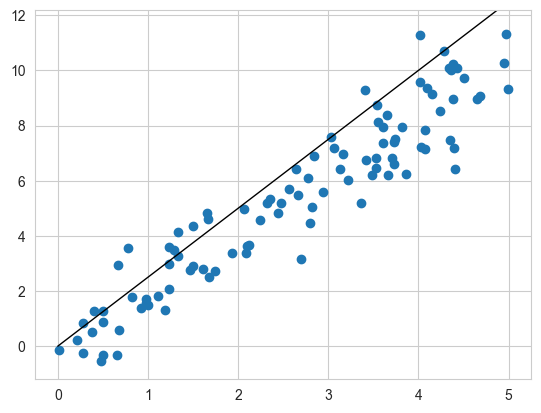

In [3]:
slope_viz(m=2.5)

In [5]:

widgets.interact(slope_viz, m=(0.2, 10, 0.2))

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0, min=0.2, step=0.2), Output()), _dom_cl…

<function __main__.slope_viz(m=1)>

Eine Liste führt zu einem Dropdown-Menü

In [6]:
w = widgets.interact(slope_viz, m=[0, 1, 3, 5])

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 3, 5), value=1), Output()), _dom_class…

Ein Boolean zu einer Checkbox

In [7]:
def slope_viz(m=1, some_bool=True):
    fig = plt.figure()
    plt.scatter(x, y)
    if some_bool:
        plt.plot(x_values, m * x_values, lw=3, color='black')

    plt.ylim(-1.2, 12.2)


widgets.interact(slope_viz, some_bool=False)

interactive(children=(IntSlider(value=1, description='m', max=3, min=-1), Checkbox(value=False, description='s…

<function __main__.slope_viz(m=1, some_bool=True)>

Ein String erzeugt ein Textfeld

In [8]:
def slope_viz(some_text, m=1):
    fig = plt.figure()
    plt.scatter(x, y)
    plt.plot(x_values, m * x_values, lw=3, color='black')
    plt.xlabel(some_text)
    plt.ylim(-1.2, 12.2)


widgets.interact(slope_viz, some_text="Klaus")

interactive(children=(Text(value='Klaus', description='some_text'), IntSlider(value=1, description='m', max=3,…

<function __main__.slope_viz(some_text, m=1)>

### Pitfall
* Interact alleine vermeiden!

In [9]:
w = widgets.interact(m=[0, 1, 3, 5])
display(w)

* stattdessen die Klasse nutzen:

In [10]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
)


Dropdown(index=1, options=('1', '2', '3'), value='2')

### Viel mehr:
* Accordion
* ColorPicker
* Slider
* Radio-Buttons
* Button
* [Liste aller Widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)

Es gibt zusätzlich [Live Tutorial](https://ipywidgets.readthedocs.io/en/stable/lite/lab/) sind ggf. aber sehr langsam.

### Aufgabe heute

Daten: `pip install vega_datasets`

Erstellen Sie ein kleines Visualisierungstool mit folgenden Anforderungen:
* Laden eines Datensatzes über das [File Upload](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#File-Upload) Widget
* Erstellen eines interaktiven [Scatterplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
* Auswahl der X und Y Achse über ein Drop-Down Menü
* Möglichkeit den erstellten Scatterplot [abzuspeichern](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)
* Bonus: 
  * Farbe inkludieren
  * Beim Speichern ein [File Dialog](https://pypi.org/project/ipyfilechooser/) nutzen, um den Pfad variabel zu setzen

In [11]:
!pip install vega_datasets



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
uploaded_file = widgets.FileUpload()
display(uploaded_file)


FileUpload(value=(), description='Upload')

In [13]:
import random
from vega_datasets import data

df: DataFrame = data.iris()

public_fig = None


def my_viz(x, y, setosa: bool = True, versicolor: bool = True, virginica: bool = True):
    global df, public_fig

    public_fig = plt.figure(figsize=(5, 5))
    if setosa:
        df2 = df[df["species"] == "setosa"]
        plt.scatter(df2[x], df2[y], color='blue')
    if versicolor:
        df2 = df[df["species"] == "versicolor"]
        plt.scatter(df2[x], df2[y], color='green')
    if virginica:
        df2 = df[df["species"] == "virginica"]
        plt.scatter(df2[x], df2[y], color='red')

    plt.title("Giga Plot")
    plt.xlabel(x)
    plt.ylabel(y)


def safe_fig():
    
    public_fig.savefig("IrisDataPlot.png")
    return 'Successfully saved'
    
    

att = df.columns.array[:-1]
w = widgets.interact(my_viz, x=att, y=att)
w2 = widgets.Button(description="Save",
                    disabled=False,
                    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
                    tooltip='Click me',
                    icon='check')
w2.on_click(safe_fig)
display(w2)
widgets.Image(value=open("IrisDataPlot.png", "rb").read())

interactive(children=(Dropdown(description='x', options=('sepalLength', 'sepalWidth', 'petalLength', 'petalWid…

Button(description='Save', icon='check', style=ButtonStyle(), tooltip='Click me')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xcb\xd6\…